# Examples of class usage
The purpose of this notebook is to provide examples of the different concepts of the framework and its implementation. The code in this notebook is not part of the implementation of the problem. The mobility test case will be used as an example.

In [1]:
from ipynb.fs.full.classes import *  # import classes
from ipynb.fs.full.case_mobility import *  # import test case mobility

# Variables

Example usage:

In [2]:
v1 = Variable("a", 0)
print(v1)

v2 = Variable("b", 2)
print(v2)

v3 = Variable("a", 0)
print(v3)

a0
b2
a0


For equality, only the self.name and granularity must be equal. A different object name (in this example "v1" and "v3") does not affect equality.

In [3]:
print(v1 == v2)
print(v1 == v3)

False
True


The hashes of v1 and v3 are equal, and distinct to v2.

In [4]:
print(hash(v1))
print(hash(v2))
print(hash(v3))

-241430502920531625
-844040199034083856
-241430502920531625


# Conversion
Conversion is only dependent on the variable itself, not on the data set it is in. It functions as an undirected graph. A conversion graph must exist for all variables.

In [5]:
# create conversion graphs
con1 = ConversionGraph(variable_name = "a",
                         granularities = [0,1,2,3],
                         conversion_edges = [(0,1), (1,2), (0,3), (0, 4), (5, 6)])
con2 = ConversionGraph(variable_name = "b",
                         granularities = [0,1,2,3, 5, 6],
                         conversion_edges = [(0,1), (1,2), (0,3), (0, 4), (4, 5)])
con3 = ConversionGraph(variable_name = "c",
                         granularities = [0,1,2,3, 5, 6],
                         conversion_edges = [(0,1), (0,2), (0,3), (0, 4), (3, 5), (1, 6), (6,7), (3,6)])
con4 = ConversionGraph(variable_name = "d",
                         granularities = [0,1,2,3],
                         conversion_edges = [(0,1), (1,2), (0,3), (0, 4), (5, 6)])
con5 = ConversionGraph(variable_name = "e",
                         granularities = [0,1,2,3, 5, 6],
                         conversion_edges = [(0,1), (1,2), (0,3), (0, 4), (4, 5)])
con6 = ConversionGraph(variable_name = "f",
                         granularities = [0,1,2,3, 5, 6],
                         conversion_edges = [(0,1), (0,2), (0,3), (0, 4), (3, 5), (1, 6), (6,7), (3,6)])

/home/ygzn@cbsp.nl/phd/MetadataFrameworkInternal/classes.ipynb:335: UserWarning: Overwriting the ConversionGraph for variable b!
  "                connected_granularities = aggregation_graph.all_aggregations(v.get_granularity())\n",
/home/ygzn@cbsp.nl/phd/MetadataFrameworkInternal/classes.ipynb:335: UserWarning: Overwriting the ConversionGraph for variable c!
  "                connected_granularities = aggregation_graph.all_aggregations(v.get_granularity())\n",


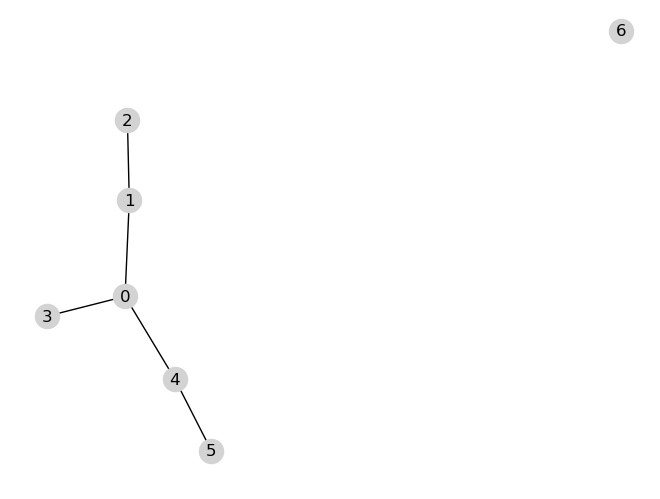

In [6]:
# plot conversion graph
con2.plot_graph()

Is there a convsersion (path) between granularities (nodes) possible?

In [7]:
print(con1.check_conversion(2, 4))
print(con1.check_conversion(0, 5))

True
False


Which granularities can be converted from a specific granularity?

In [8]:
print(con1.all_conversions(0))
print(con1.all_conversions(5))

{1, 2, 3, 4}
{6}


The classmethod get() allows us to find an instance of the class for a desired variable name. In the following code, switch between var_name "a" and "b" and execute the plot to see that the correct instance is found in this way. This will be usefull later, when a dataset with variables is known and we want to find a conversiongraph for one of the variables, without having to hard code the variable name.

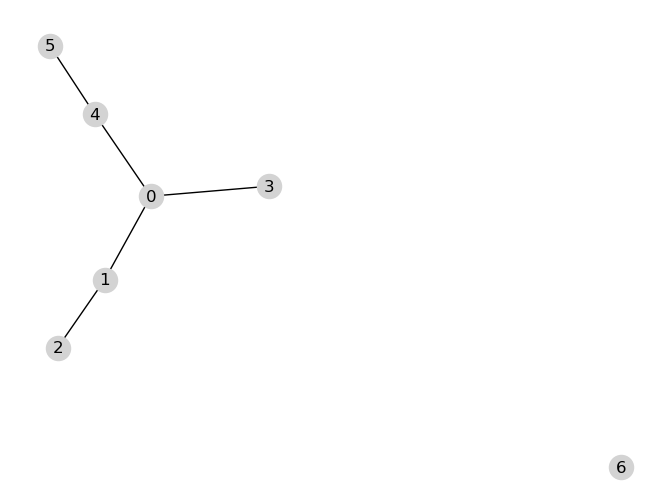

In [9]:
con_x = ConversionGraph.get(var_name = "b")
con_x.plot_graph()

If the ConversionGraph was not initialised, it will raise an error. Due to the `%%script true` line, the error that would be raised by this cell does not stop a `Run all`. To execute this cell, remove or comment out the `%%script true` line. 

In [10]:
%%script true
con_x = ConversionGraph.get(var_name = "z")
con_x.plot_graph()

# Aggregation
Aggregation is only dependent on the variable itself, not on the data set it is in. It functions as a directed graph.

In [11]:
# create aggregation graphs
agg1 = AggregationGraph(variable_name = "a",
                        granularities = [0,1,2,3, 5, 6],
                        aggregation_edges = [(0,1), (1,2), (2,5), (0,6), (0, 4), (5, 6)])

agg2 = AggregationGraph(variable_name = "b",
                        granularities = [0,1,2,3],
                        aggregation_edges = [(0,1), (1,2), (2,1), (0,3), (0, 4), (5, 6)])

agg3 = AggregationGraph(variable_name = "c",
                        granularities = [0,1,2,3],
                        aggregation_edges = [(0,1), (1,2), (2,1), (0,3), (0, 4), (5, 6), (1,7)])

agg4 = AggregationGraph(variable_name = "d",
                        granularities = [0,1,2,3, 5, 6],
                        aggregation_edges = [(0,1), (1,2), (2,5), (0,6), (0, 4), (5, 6)])

agg5 = AggregationGraph(variable_name = "e",
                        granularities = [0,1,2,3],
                        aggregation_edges = [(0,1), (1,2), (2,1), (0,3), (0, 4), (5, 6)])

agg6 = AggregationGraph(variable_name = "f",
                        granularities = [0,1,2,3],
                        aggregation_edges = [(0,1), (1,2), (2,1), (0,3), (0, 4), (5, 6), (1,7)])

/home/ygzn@cbsp.nl/phd/MetadataFrameworkInternal/classes.ipynb:402: UserWarning: Overwriting the AggregationGraph for variable b!
  "        self.Graph = nx.Graph()\n",
/home/ygzn@cbsp.nl/phd/MetadataFrameworkInternal/classes.ipynb:402: UserWarning: Overwriting the AggregationGraph for variable c!
  "        self.Graph = nx.Graph()\n",


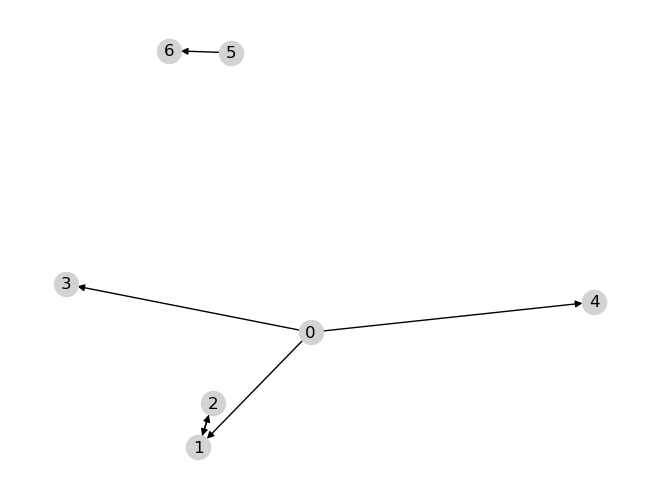

In [12]:
# plot aggregation graph
agg2.plot_graph()

In [13]:
print(agg1.check_aggregation(2, 4))
print(agg1.check_aggregation(0, 2))
print(agg1.check_aggregation(0, 5))

False
True
True


Which granularities can be converted from a specific granularity?

In [14]:
print(agg1.all_aggregations(0))
print(agg2.all_aggregations(1))

{1, 2, 4, 5, 6}
{2}


[0, 1, 2, 3]


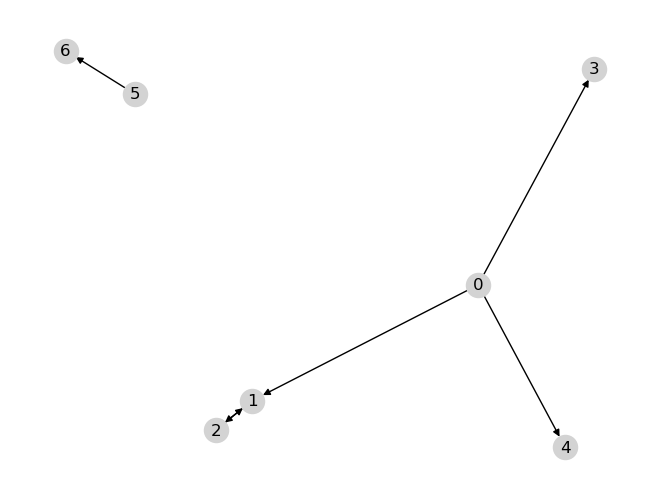

In [15]:
agg_x = AggregationGraph.get("b")
print(agg_x.granularities)
agg_x.plot_graph()

# Data set
Contains a list of left-hand variables and a list of right-hand variables.

In [16]:
data1 = Data(left_variables =[Variable("a", 1), Variable("b", 3)],
          right_variables =[Variable("b", 1), Variable("a", 2)],
         context="I")
data2 = Data(left_variables =[Variable("e", 1), Variable("b", 3)],
          right_variables =[Variable("c", 1), Variable("a", 3)],
         context="I")
data3 = Data(left_variables =[Variable("a", 1), Variable("b", 3)],
          right_variables =[Variable("c", 1), Variable("a", 3)],
         context="II")
data4 = Data(left_variables =[Variable("a", 1), Variable("b", 3)],
          right_variables =[Variable("c", 1), Variable("a", 3)],
         context="I")
print(data1)

(a1, b3 | a2, b1)_['I']


Euquality depends on the equality of left_variables, right_variables and context. A different name for the same data sources does not affect euqality:

In [17]:
print(data1 == data2)
print(data1 == data3)  
print(data1 == data4)

False
False
False


Similarity between two data sources is based on the variables and context they have in common. If two data sets are equal, then the similarity score will be huge.

In [18]:
print(data1.similarity(data2))
print(data1.similarity(data3))
print(data2.similarity(data3))
print(data1.similarity(data1))

11
11
20
11


Neighbours of a data source are defined as all other data sources that can be created by a single conversion or aggregation. Note that combination is not included here, because it requires two input data sources.

In [19]:
print(str(data1) + " has neighbours: ")

neighbours = data1.get_neighbours()
for n in neighbours:
    print(n)

(a1, b3 | a2, b1)_['I'] has neighbours: 
(a0, b3 | a2, b1)_['I']
(a1, b5 | a2, b1)_['I']
(a1, b3 | a6, b1)_['I']
(a2, b3 | a2, b1)_['I']
(a1, b4 | a2, b1)_['I']
(a1, b2 | a2, b1)_['I']
(a4, b3 | a2, b1)_['I']
(a1, b0 | a2, b1)_['I']
(a3, b3 | a2, b1)_['I']
(a1, b3 | a2, b2)_['I']
(a1, b3 | a5, b1)_['I']
(a1, b1 | a2, b1)_['I']


# Combining
Combining depends on two data sources. It is allowed when their right variables are equal. Column wise combining: when the contexts of both input sources have some overlap (non-empty intersection), the union of all left variables is available in the new data source, for the intersection of the context. Row wise combining: when the contexts of both sources have no overlap (empty intersection), the intersection of the left variables is available in the new data source, but the new context is the union of the context of the two input sources. Sometimes, both row-wise and column-wise combination are possible, resulting into two different outcomes. The combines() function checks both options and will return a tuple with te row- and column-wise combination results respectively. If a combination is not possible, the result will be False.

In [20]:
# define data sources:
data1 = Data(left_variables =[Variable("a", 1), Variable("b", 3)],
          right_variables =[Variable("c", 1), Variable("a", 3)],
         context=["I", "II"])
data2 = Data(left_variables =[Variable("e", 1), Variable("b", 3)],
          right_variables =[Variable("c", 1), Variable("a", 3)],
         context=["I", "III"])
data3 = Data(left_variables =[Variable("e", 1), Variable("b", 3)],
          right_variables =[Variable("c", 1), Variable("a", 3)],
         context=["II"])

In [21]:
data1_2_row, data1_2_col = combines(data1, data2)

print(data1, " + ", data2, " -- row-wise --> ", data1_2_row)
print(data1, " + ", data2, " -- column-wise --> ", data1_2_col)

(a1, b3 | a3, c1)_['I', 'II']  +  (b3, e1 | a3, c1)_['I', 'III']  -- row-wise -->  (b3 | a3, c1)_['I', 'II', 'III']
(a1, b3 | a3, c1)_['I', 'II']  +  (b3, e1 | a3, c1)_['I', 'III']  -- column-wise -->  (a1, b3, e1 | a3, c1)_['I']


In [22]:
data1_3_row, data1_3_col = combines(data1, data3)

print(data1, " + ", data3, " -- row-wise --> ", data1_3_row)
print(data1, " + ", data3, " -- column-wise --> ", data1_3_col)

(a1, b3 | a3, c1)_['I', 'II']  +  (b3, e1 | a3, c1)_['II']  -- row-wise -->  (b3 | a3, c1)_['I', 'II']
(a1, b3 | a3, c1)_['I', 'II']  +  (b3, e1 | a3, c1)_['II']  -- column-wise -->  (a1, b3, e1 | a3, c1)_['II']


In [23]:
data2_3_row, data2_3_col = combines(data2, data3)

print(data2, " + ", data3, " -- row-wise --> ", data2_3_row)
print(data2, " + ", data3, " -- column-wise --> ", data2_3_col)

(b3, e1 | a3, c1)_['I', 'III']  +  (b3, e1 | a3, c1)_['II']  -- row-wise -->  (b3, e1 | a3, c1)_['I', 'II', 'III']
(b3, e1 | a3, c1)_['I', 'III']  +  (b3, e1 | a3, c1)_['II']  -- column-wise -->  False


# Set of currently available sources
We start with a set of available sources. In the search towards the goal, the set of available sources will be updated based on manipulation steps applied to each source. 

Define start set with two data sources. Checking if the third source is in the set, should return False.

In [24]:
# define start set
start_set = {data1, data2}
available_set = SetOfSources(start_set)
print(available_set)
print(available_set.contains(data3))

{(a1, b3 | a3, c1)_['I', 'II'],
 (b3, e1 | a3, c1)_['I', 'III']
}
False


Add a third source. Checking that it is in the set, should now return True.

In [25]:
available_set.add_data_source(data3, part_of_path="test")
print(available_set)

# adding the same source again, does not get added to the list
available_set.add_data_source(data3)
print(available_set)
print(available_set.contains(data3))

{(a1, b3 | a3, c1)_['I', 'II'],
 (b3, e1 | a3, c1)_['I', 'III'],
 (b3, e1 | a3, c1)_['II']
}
{(a1, b3 | a3, c1)_['I', 'II'],
 (b3, e1 | a3, c1)_['I', 'III'],
 (b3, e1 | a3, c1)_['II']
}
True


Even more so, checking if a different object (data4) is in the set, when it has the exact same properties as one of the objects in the set (data1) should also return True.

In [26]:
data4 = Data(left_variables =[Variable("a", 1), Variable("b", 3)],
             right_variables =[Variable("c", 1), Variable("a", 3)],
             context="I")
print(available_set.contains(data4))

True


The similarity of a data source can be compared to the available set. Note: several variants of the similarity score are implemented. 

In [27]:
data5 = Data(left_variables =[Variable("a", 1), Variable("b", 3)],
             right_variables =[Variable("c", 1), Variable("a", 4)],
             context="II")
available_set.similarity_max(data5)

16

All data sources that can be created from the available sources can be found using get_neighbours(). This includes all neighbours from a single conversion, aggregation or combination.

In [28]:
print([str(x) for x in available_set.get_neighbours(agg=True)])

["(b3, e0 | a3, c1)_['I', 'III']", "(a4, b3 | a3, c1)_['I', 'II']", "(b5, e1 | a3, c1)_['II']", "(a3, b3 | a3, c1)_['I', 'II']", "(b1, e1 | a3, c1)_['I', 'III']", "(b3, e0 | a3, c1)_['II']", "(b3, e1 | a3, c2)_['I', 'III']", "(b3 | a3, c1)_['I', 'II']", "(b3, e1 | a3, c7)_['I', 'III']", "(a0, b3 | a3, c1)_['I', 'II']", "(b3, e5 | a3, c1)_['I', 'III']", "(b3, e4 | a3, c1)_['II']", "(b1, e1 | a3, c1)_['II']", "(a1, b2 | a3, c1)_['I', 'II']", "(b3, e5 | a3, c1)_['II']", "(a1, b5 | a3, c1)_['I', 'II']", "(b4, e1 | a3, c1)_['I', 'III']", "(b2, e1 | a3, c1)_['I', 'III']", "(a1, b0 | a3, c1)_['I', 'II']", "(b3, e2 | a3, c1)_['II']", "(a1, b1 | a3, c1)_['I', 'II']", "(a1, b3, e1 | a3, c1)_['II']", "(b3, e3 | a3, c1)_['II']", "(b4, e1 | a3, c1)_['II']", "(b3, e1 | a3, c2)_['II']", "(b3, e2 | a3, c1)_['I', 'III']", "(a1, b4 | a3, c1)_['I', 'II']", "(b2, e1 | a3, c1)_['II']", "(a1, b3, e1 | a3, c1)_['I']", "(b3, e1 | a3, c1)_['I', 'II', 'III']", "(b3, e4 | a3, c1)_['I', 'III']", "(a1, b3 | a3, c7

During the search, it is important to identify of two sets of sources are equal. This is possible because of the __eq__() method.

In [29]:
set1 = SetOfSources(start_set=[data1, data2])
set2 = SetOfSources(start_set=[data2, data1])
set3 = SetOfSources(start_set=[data2, data3])
print(set1 == set2)
print(set1 == set3)

True
False


# Modelling
Modelling is currently implemented as exceptions to the rules of the other manipulations. Each available model, however trivial, must be specified.

In [30]:
# define data sources:
data1 = Data(left_variables =[Variable("a", 1), Variable("b", 3)],
          right_variables =[Variable("c", 1), Variable("a", 3)],
         context=["I", "II"])
data2 = Data(left_variables =[Variable("e", 1), Variable("b", 3)],
          right_variables =[Variable("c", 1), Variable("a", 3)],
         context=["III"])
data3 = Data(left_variables =[Variable("e", 1), Variable("b", 3)],
          right_variables =[Variable("c", 1), Variable("a", 3)],
         context=["II"])

model1 = Model(input_data=[data1, data2], output_data=data3, context_rule="exact")
model2 = Model(input_data=[data1, data2], output_data=data3, context_rule="union")

Apply the model for different combinations of available data sets:

In [31]:
available_data = SetOfSources(start_set=[data1, data2])

print(available_data, " -- model 1 --> ", model1.apply(available_data.get_sources())[0])

print(available_data, " -- model 2 --> ", model2.apply(available_data.get_sources())[0])

{(a1, b3 | a3, c1)_['I', 'II'],
 (b3, e1 | a3, c1)_['III']
}  -- model 1 -->  (b3, e1 | a3, c1)_['II']
{(a1, b3 | a3, c1)_['I', 'II'],
 (b3, e1 | a3, c1)_['III']
}  -- model 2 -->  (b3, e1 | a3, c1)_['I', 'II', 'III']


# Test mobility example models

In [40]:
# define data sources:
data1 = Data(left_variables =[Variable("b", 0), # source 0
                              Variable("od", 0)],
             right_variables =[Variable("p", 0),
                               Variable("t", 2)],
             context=["A", "B"])
                               
data2 = Data(left_variables =[Variable("m", 0)],  # source 1
             right_variables =[Variable("p", 0),
                               Variable("t", 2)],
             context=["A"])

data3 = Data(left_variables =[Variable("b", 0), # source 0
                              Variable("od", 0)],
             right_variables =[Variable("p", 0),
                               Variable("t", 2)],
             context=["B"])


model_mm = ModelModalityChoice()

In [39]:
available_data = SetOfSources(start_set=[data1, data2, data3])
print(available_data, " -- model 1 --> ", model_mm.apply(available_data.get_sources())[0])

for m in model_mm.apply(available_data.get_sources()):
    print("***")
    print(m)


{(b0, od0 | p0, t2)_['B'],
 (m0 | p0, t2)_['A'],
 (b0, od0 | p0, t2)_['A', 'B']
}  -- model 1 -->  (p0 | od0, t2)_['A', 'B']
***
(p0 | od0, t2)_['A', 'B']


Test if adding models to the get_neighbours function helps to find more neighbours than without the models.

In [46]:
# without modelling
available_data = SetOfSources(start_set=[data1, data2])
print([str(x) for x in available_data.get_neighbours()])

["(b5, od0 | p0, t2)_['A', 'B']", "(b4, od0 | p0, t2)_['A', 'B']", "(b1, od0 | p0, t2)_['A', 'B']", "(b3, od0 | p0, t2)_['A', 'B']", "(b0, m0, od0 | p0, t2)_['A']", "(b2, od0 | p0, t2)_['A', 'B']"]


In [47]:
# with modelling (only)
available_data = SetOfSources(start_set=[data1, data2])
print([str(x) for x in available_data.get_neighbours_models(models=[model_mm])])

["(p0 | od0, t2)_['A', 'B']"]


### For the entire test 

In [34]:
test = test_mobility

In [ ]:
print(type(test.start_set))
print(type(test.models))
print(type(test.models[0]))

In [37]:
all_neighbours = test.start_set.get_neighbours(agg=False)